# Project Title:HR Analytics Challenge

### Problem Statement:Your client is a large MNC and they have 9 broad verticals across the organisation. One of the problem your client is facing is around identifying the right people for promotion (only for manager position and below) and prepare them in time. Currently the process, they are following is:
### 1.They first identify a set of employees based on recommendations/ past performance
### 2.Selected employees go through the separate training and evaluation program for each vertical. These programs are based on the required skill of each vertical
### 3.At the end of the program, based on various factors such as training performance, KPI completion (only employees with KPIs completed greater than 60% are considered) etc., employee gets promotion
### For above mentioned process, the final promotions are only announced after the evaluation and this leads to delay in transition to their new roles. Hence, company needs your help in identifying the eligible candidates at a particular checkpoint so that they can expedite the entire promotion cycle. 
### They have provided multiple attributes around Employee's past and current performance along with demographics. Now, The task is to predict whether a potential promotee at checkpoint in the test set will be promoted or not after the evaluation process.

In [ ]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
import os
os.getcwd()

'/content'

In [ ]:
#Load the Data
hrtrain=pd.read_csv('/hr_train_LZdllcl.csv')

In [ ]:
hrtest=pd.read_csv('/hr_test_2umaH9m.csv')

In [ ]:
hrtrain.head(2)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0


In [ ]:
hrtest.head(2)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51


# EDA

In [ ]:
hrtrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [ ]:
hrtrain.avg_training_score.describe()

count    54808.000000
mean        63.386750
std         13.371559
min         39.000000
25%         51.000000
50%         60.000000
75%         76.000000
max         99.000000
Name: avg_training_score, dtype: float64

##### Skewness and Kurtosis

In [ ]:
###Skewness:if the skewness is between -0.5 & 0.5, the data are nearly symmetrical.
#If the skewness is between -1 & -0.5 (negative skewed) or between 0.5 & 1(positive skewed), the data are slightly skewed.
#If the skewness is lower than -1 (negative skewed) or greater than 1 (positive skewed), the data are extremely skewed. 
### Kurtosis : The height of the Distribution Curve with respect to Normal Distribution
#It tells us if the data is heavy or light tailed relative to a normal distribution.
#Kurtosis range from -10 to +10.

In [ ]:
print(hrtrain.avg_training_score.skew())
print(hrtrain.avg_training_score.kurt())

0.45190808551707995
-1.049649301934108


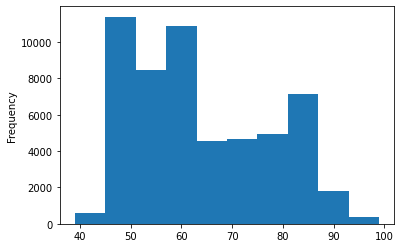

In [ ]:
#Histogram, Boxplot & Density Curve - avg_training_score
hrtrain.avg_training_score.plot(kind='hist')

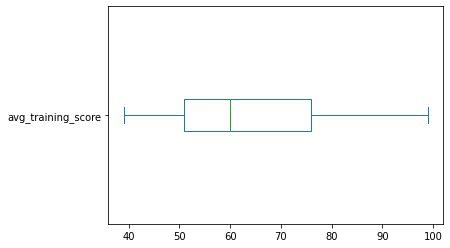

In [ ]:
hrtrain.avg_training_score.plot(kind='box',vert=False)

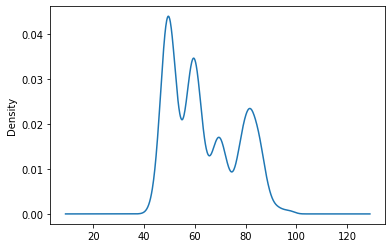

In [ ]:
hrtrain.avg_training_score.plot(kind='density')

In [ ]:
hrtrain[['age','avg_training_score']].cov()

,age,avg_training_score
age,58.678192,-4.955455
avg_training_score,-4.955455,178.798603


In [ ]:
hrtrain[['age','avg_training_score']].corr()

,age,avg_training_score
age,1.00000,-0.04838
avg_training_score,-0.04838,1.00000


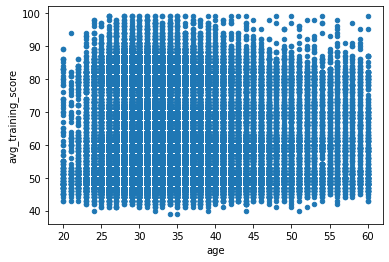

In [ ]:
hrtrain.plot(x='age',y='avg_training_score',kind='scatter')

In [ ]:
# Non Numeric Categorical Data - Frequency Counts and Cross Tabulation
# Cross tabulation is frequency table of 2 non numeric categorical variables
# How many types of education are there?
hrtrain.education.value_counts(dropna=False)

Bachelor's          36669
Master's & above    14925
NaN                  2409
Below Secondary       805
Name: education, dtype: int64

In [ ]:
# Frequency counts of variable gender
hrtrain.gender.value_counts(dropna=False)

m    38496
f    16312
Name: gender, dtype: int64

In [ ]:
# Departmentwise Gender? # Cross tabulation
pd.crosstab(hrtrain.department,hrtrain.gender)

gender,f,m
department,,
Analytics,513,4839
Finance,681,1855
HR,1006,1412
Legal,149,890
Operations,4677,6671
Procurement,3287,3851
R&D,57,942
Sales & Marketing,3154,13686
Technology,2788,4350


In [ ]:
# Frequency count of previous_year_rating
hrtrain.previous_year_rating.value_counts(dropna=False)

3.0    18618
5.0    11741
4.0     9877
1.0     6223
2.0     4225
NaN     4124
Name: previous_year_rating, dtype: int64

In [ ]:
# Cross Tabulation of previous_year_rating and gender
pd.crosstab(hrtrain.previous_year_rating,hrtrain.gender)

gender,f,m
previous_year_rating,,
1.0,1661,4562
2.0,1221,3004
3.0,5633,12985
4.0,3037,6840
5.0,3602,8139


In [ ]:
# Who performed well in terms of avg_training_score, male or female?
hrtrain.avg_training_score.groupby(hrtrain.gender).mean()
# leftside of groupby is Numerical
# rightside within brackets of groupby is Categorical(Non Numeric)
# Statistical Function must be speciifed median, std, skew, kurt, etc.

gender
f    63.889897
m    63.173550
Name: avg_training_score, dtype: float64

In [ ]:
# What is the median age of male and female employees?
hrtrain.age.groupby(hrtrain.gender).median()

gender
f    33.0
m    33.0
Name: age, dtype: float64

In [ ]:
# Dependent Variable - is_promoted (0/1 No/Yes)
hrtrain.is_promoted.value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

In [ ]:
# What is the Average avg_training_score of is_promoted 0 & 1?
hrtrain.avg_training_score.groupby(hrtrain.is_promoted).mean()

is_promoted
0    62.647686
1    71.325193
Name: avg_training_score, dtype: float64

In [ ]:
# 2 Categorical Variables in groupby function
# What is the Average avg_training_score of is_promoted and gender?
hrtrain.avg_training_score.groupby([hrtrain.is_promoted,
                                   hrtrain.gender]).mean()

is_promoted  gender
0            f         63.089256
             m         62.461963
1            f         71.991820
             m         71.019681
Name: avg_training_score, dtype: float64

In [ ]:
# Proportion of Promotions in Departments
np.round(pd.crosstab(hrtrain.department,hrtrain.is_promoted,margins=True,
           normalize='index'),decimals=2)*100

is_promoted,0,1
department,,
Analytics,90.0,10.0
Finance,92.0,8.0
HR,94.0,6.0
Legal,95.0,5.0
Operations,91.0,9.0
Procurement,90.0,10.0
R&D,93.0,7.0
Sales & Marketing,93.0,7.0
Technology,89.0,11.0


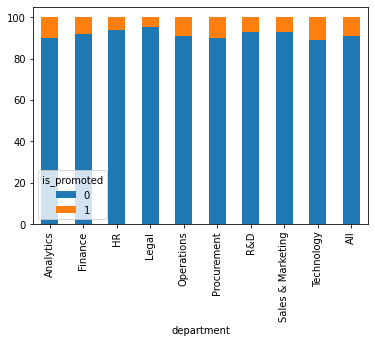

In [ ]:
(np.round(pd.crosstab(hrtrain.department,hrtrain.is_promoted,margins=True,
           normalize='index'),decimals=2)*100).plot(kind='bar',
                                                   stacked=True)

#### Finding the Correlation between variables:

In [ ]:
#covariance on multiple numeric variables
hrtrain[['no_of_trainings','age','length_of_service',
        'avg_training_score']].cov()

,no_of_trainings,age,length_of_service,avg_training_score
no_of_trainings,0.371203,-0.379329,-0.148832,0.346378
age,-0.379329,58.678192,21.468711,-4.955455
length_of_service,-0.148832,21.468711,18.191028,-2.174143
avg_training_score,0.346378,-4.955455,-2.174143,178.798603


In [ ]:
#correlation on multiple numeric variables
hrtrain[['no_of_trainings','age','length_of_service',
        'avg_training_score']].corr()
#between length_of_service and age we have moderate correlation rest of all has no correlation

,no_of_trainings,age,length_of_service,avg_training_score
no_of_trainings,1.000000,-0.081278,-0.057275,0.042517
age,-0.081278,1.000000,0.657111,-0.048380
length_of_service,-0.057275,0.657111,1.000000,-0.038122
avg_training_score,0.042517,-0.048380,-0.038122,1.000000


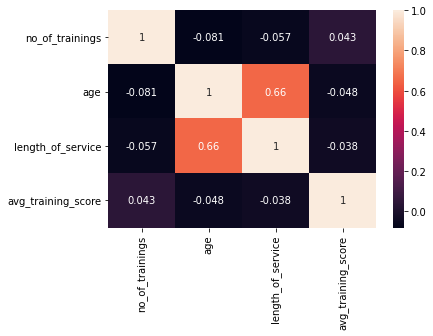

In [ ]:
sns.heatmap(hrtrain[['no_of_trainings','age','length_of_service',
        'avg_training_score']].corr(),annot=True)

#### Missing Values Treatment

In [ ]:
#check for null/missing values in train and test data
hrtrain.isnull().sum().sort_values(ascending=False)

previous_year_rating    4124
education               2409
employee_id                0
department                 0
region                     0
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [ ]:
hrtest.isnull().sum().sort_values(ascending=False)

previous_year_rating    1812
education               1034
employee_id                0
department                 0
region                     0
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [ ]:
print(hrtrain.shape)
print(hrtest.shape)

(54808, 14)
(23490, 13)


In [ ]:
hrtest['is_promoted']='test' # Add Dependent Variable to test data for Row Concatenation

In [ ]:
combinedf=pd.concat([hrtrain,hrtest],axis=0) # Row wise concatenation

In [ ]:
combinedf.shape # 78298 observtions with 14 variables

(78298, 14)

In [ ]:
combinedf.education.value_counts(dropna=False) # Frequency counts

Bachelor's          52247
Master's & above    21429
NaN                  3443
Below Secondary      1179
Name: education, dtype: int64

In [ ]:
# Impute Missing values in education variable with "Bachelor's". NA's are only 4.4% and 
# already "Bachelor's" is very large segment, there will no effect on data pattern/trend
combinedf.education=combinedf.education.fillna("Bachelor's")

In [ ]:
combinedf.previous_year_rating.value_counts(dropna=False)

3.0    26539
5.0    16838
4.0    14126
1.0     8903
2.0     5956
NaN     5936
Name: previous_year_rating, dtype: int64

In [ ]:
# Impute with 3.0 rating as it is the largest segment and missing values are few
combinedf.previous_year_rating=combinedf.previous_year_rating.fillna(3.0)

In [ ]:
# For Dummy Encoding or Label Encoding - Split data into numeric and object columns
numericcols=combinedf.select_dtypes(include=np.number) # np.number-float64 & int64
objectcols=combinedf.select_dtypes(include=['object']) # object columns

In [ ]:
print(numericcols.shape)
print(objectcols.shape)

(78298, 8)
(78298, 6)


In [ ]:
numericcols.columns # All Numeric data will not be numeric. They might be representing
# categories. previous_year_rating(1-5),KPIs_met >80% & awards_won? - 0 (No)& 1(Yes)

Index(['employee_id', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score'],
      dtype='object')

In [ ]:
numericcols['KPIs_met >80%'].value_counts()

0    50578
1    27720
Name: KPIs_met >80%, dtype: int64

In [ ]:
numericcols['awards_won?'].value_counts()

0    76493
1     1805
Name: awards_won?, dtype: int64

In [ ]:
# Add categorical cols from numeric cols to objectcols
objectcols['previous_year_rating']=numericcols.previous_year_rating
objectcols['KPIs_met >80%']=numericcols['KPIs_met >80%']
objectcols['awards_won?']=numericcols['awards_won?']

<ipython-input-47-2163e443b0f8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  objectcols['previous_year_rating']=numericcols.previous_year_rating
<ipython-input-47-2163e443b0f8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  objectcols['KPIs_met >80%']=numericcols['KPIs_met >80%']
<ipython-input-47-2163e443b0f8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

In [ ]:
# Drop Categorical cols from numeric cols
numericcols=numericcols.drop(['previous_year_rating','KPIs_met >80%','awards_won?'],axis=1)
# axis=1 is column dropping

In [ ]:
numericcols['is_promoted']=objectcols.is_promoted

In [ ]:
objectcols=objectcols.drop('is_promoted',axis=1)

In [ ]:
print(numericcols.shape)
print(objectcols.shape)

(78298, 6)
(78298, 8)


In [ ]:
objectcols.head(3)

,department,region,education,gender,recruitment_channel,previous_year_rating,KPIs_met >80%,awards_won?
0,Sales & Marketing,region_7,Master's & above,f,sourcing,5.0,1,0
1,Operations,region_22,Bachelor's,m,other,5.0,0,0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,3.0,0,0


#### Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le=LabelEncoder()

In [ ]:
objectcolsdummy=objectcols.apply(le.fit_transform)
objectcolsdummy.head(3)

,department,region,education,gender,recruitment_channel,previous_year_rating,KPIs_met >80%,awards_won?
0,7,31,2,0,2,4,1,0
1,4,14,0,1,0,4,0,0
2,7,10,0,1,2,2,0,0


In [ ]:
# Concat both dataframe numeric & object into one
combinedf_clean=pd.concat([numericcols,objectcolsdummy],axis=1) # Column wise concatenation

In [ ]:
# Split back to traindata and testdata
hrtraindf=combinedf_clean[combinedf_clean.is_promoted!='test']
hrtestdf=combinedf_clean[combinedf_clean.is_promoted=='test']

In [ ]:
hrtestdf=hrtestdf.drop('is_promoted',axis=1)

In [ ]:
hrtraindf.is_promoted.value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

#### Hypothesis Testing

In [ ]:
# Test Null Average avg_training_score of is_promoted 0 & 1 equal?
hrtraindf.avg_training_score.groupby(hrtraindf.is_promoted).mean()

is_promoted
0    62.647686
1    71.325193
Name: avg_training_score, dtype: float64

In [ ]:
# Since there are exactly 2 levels in Categorical varaible -
# 2 Sample Independent t test
promotedyes=hrtraindf[hrtraindf.is_promoted==1]
promotedno=hrtraindf[hrtraindf.is_promoted==0]

In [ ]:
from scipy.stats import ttest_ind

In [ ]:
ttest_ind(promotedyes.avg_training_score,promotedno.avg_training_score,
         equal_var=False)
# Since pvalue=7.662329172468838e-291 is less than 0.05, Reject Null

Ttest_indResult(statistic=38.82675007357188, pvalue=7.662329172468838e-291)

In [ ]:
# Test Null Average avg_training_score for different recruitment_channel
# is equal?
hrtraindf.avg_training_score.groupby(hrtraindf.recruitment_channel).mean()

recruitment_channel
0    63.362839
1    66.182137
2    63.280620
Name: avg_training_score, dtype: float64

In [ ]:
# Since there are more than 2 levels in Categorical Variable - Anova
# Single Factor
other=hrtraindf[hrtraindf.recruitment_channel==0]
refer=hrtraindf[hrtraindf.recruitment_channel==1]
source=hrtraindf[hrtraindf.recruitment_channel==2]

In [ ]:
from scipy.stats import f_oneway

In [ ]:
f_oneway(other.avg_training_score,refer.avg_training_score,
        source.avg_training_score)
# Since pvalue=6.585805990029605e-12 is less than 0.05, Reject Null

F_onewayResult(statistic=25.758203095600134, pvalue=6.585805990029605e-12)

In [ ]:
# Test Null No Association between gender and is_promoted
pd.crosstab(hrtraindf.is_promoted,hrtraindf.gender)
# Both Variables are non numeric and categorical - Chi Square Test
# of Independence
# Input of Chi Square Test of Independence is Cross Tabulation
# Cross tabulation is frequency table of 2 non numeric categorical
# variables

gender,0,1
is_promoted,,
0,14845,35295
1,1467,3201


In [ ]:
from scipy.stats import chi2_contingency

In [ ]:
chi2_contingency(pd.crosstab(hrtraindf.is_promoted,hrtraindf.gender))
# Since p-value=0.009765091521176657 is less than 0.05, Reject Null

(6.677254566546107,
 0.009765091521176657,
 1,
 array([[14922.70617428, 35217.29382572],
        [ 1389.29382572,  3278.70617428]]))

In [ ]:
hrtraindf.columns

Index(['employee_id', 'no_of_trainings', 'age', 'length_of_service',
       'avg_training_score', 'is_promoted', 'department', 'region',
       'education', 'gender', 'recruitment_channel', 'previous_year_rating',
       'KPIs_met >80%', 'awards_won?'],
      dtype='object')

In [ ]:
# Split data into Dependent Variable(y) and Independent variables(X)
y=hrtraindf.is_promoted
X=hrtraindf.drop(['employee_id','is_promoted'],axis=1)

In [ ]:
y=le.fit_transform(y) # label encode dependent variable

### Model Building

In [ ]:
#LogisticRegression
from sklearn.linear_model import LogisticRegression

In [ ]:
logit=LogisticRegression(max_iter=2000)

In [ ]:
logitmodel=logit.fit(X,y)

In [ ]:
logitmodel.score(X,y) # Accuracy from Confusion Matrix

0.9172566048752007

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
cross_val_score(logit,X,y)

array([0.91817187, 0.91589126, 0.9168035 , 0.91743454, 0.91807317])

In [ ]:
np.mean([0.91817187, 0.91598248, 0.9168035 , 0.91734331, 0.91807317])

0.917274866

In [ ]:
logitpredict=logitmodel.predict(X)

In [ ]:
pd.crosstab(y,logitpredict)

col_0,0,1
row_0,,
0,49947,193
1,4342,326


In [ ]:
(49948+321)/(49948+192+4347+321)

0.9171836228287841

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y,logitpredict))
# Overall Accuracy is good but Precision,Recall and F1Score
# of minority class(1) is very bad. Majority class(0) is good

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     50140
           1       0.63      0.07      0.13      4668

    accuracy                           0.92     54808
   macro avg       0.77      0.53      0.54     54808
weighted avg       0.90      0.92      0.89     54808



Balancing the imbalanced data using SMOTEN

In [ ]:
from imblearn.over_sampling import SMOTEN

In [ ]:
smoten=SMOTEN(random_state=45)

In [ ]:
X_smoten,y_smoten=smoten.fit_resample(X,y)

In [ ]:
logit_smoten=logit.fit(X_smoten,y_smoten)

In [ ]:
logit_smoten.score(X_smoten,y_smoten)

0.7568209014758676

In [ ]:
cross_val_score(logit_smoten,X_smoten,y_smoten)

array([0.72018349, 0.76445951, 0.76226566, 0.76326286, 0.76949541])

In [ ]:
np.mean([0.72018349, 0.76450937, 0.7622158 , 0.76326286, 0.76964499])

0.755963302

In [ ]:
logit_smoten_predict=logit_smoten.predict(X_smoten)

In [ ]:
print(classification_report(y_smoten,logit_smoten_predict))

              precision    recall  f1-score   support

           0       0.76      0.75      0.75     50140
           1       0.75      0.77      0.76     50140

    accuracy                           0.76    100280
   macro avg       0.76      0.76      0.76    100280
weighted avg       0.76      0.76      0.76    100280



In [ ]:
# Predict on test data
hrtestdf=hrtestdf.drop('employee_id',axis=1)

In [ ]:
logit_smoten_predict=logit_smoten.predict(hrtestdf)

In [ ]:
pd.DataFrame(logit_smoten_predict).to_csv('logistic1.csv')

In [ ]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
tree_smoten=DecisionTreeClassifier(max_depth=8)

In [ ]:
treemodel_smoten=tree_smoten.fit(X_smoten,y_smoten)

In [ ]:
treemodel_smoten.score(X_smoten,y_smoten) 

0.8315217391304348

In [ ]:
cross_val_score(tree_smoten,X_smoten,y_smoten)

array([0.77512964, 0.83640806, 0.83655764, 0.83251895, 0.83984842])

In [ ]:
np.mean([0.77433187, 0.83640806, 0.83655764, 0.83256881, 0.83984842])

0.8239429600000001

In [ ]:
tree_smoten_predict=tree_smoten.predict(X_smoten)

In [ ]:
print(classification_report(y_smoten,tree_smoten_predict))

              precision    recall  f1-score   support

           0       0.86      0.79      0.82     50140
           1       0.81      0.87      0.84     50140

    accuracy                           0.83    100280
   macro avg       0.83      0.83      0.83    100280
weighted avg       0.83      0.83      0.83    100280



In [ ]:
tree_smoten_predict=tree_smoten.predict(hrtestdf)

In [ ]:
pd.DataFrame(tree_smoten_predict).to_csv('tree1.csv')

In [ ]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
RF_smoten=RandomForestClassifier(n_estimators=1000)

In [ ]:
RFmodel_smoten = RF_smoten.fit(X_smoten,y_smoten)

In [ ]:
RFmodel_smoten.score(X_smoten,y_smoten)

0.9995811727163941

In [ ]:
cross_val_score(RFmodel_smoten,X_smoten,y_smoten)

array([0.82708416, 0.98239928, 0.9820004 , 0.98374551, 0.98324691])

In [ ]:
np.mean([0.82638612, 0.98239928, 0.98180096, 0.98319705, 0.98329677])

0.951416036

In [ ]:
RF_smoten_predict=RF_smoten.predict(X_smoten)

In [ ]:
print(classification_report(y_smoten,RF_smoten_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     50140
           1       1.00      1.00      1.00     50140

    accuracy                           1.00    100280
   macro avg       1.00      1.00      1.00    100280
weighted avg       1.00      1.00      1.00    100280



In [ ]:
RF_smoten_predict=RF_smoten.predict(hrtestdf)

In [ ]:
pd.DataFrame(RF_smoten_predict).to_csv('RF1.csv')

In [ ]:
#Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gbm_smoten=GradientBoostingClassifier(n_estimators=1000)

In [ ]:
gbmmodel_smoten = gbm_smoten.fit(X_smoten,y_smoten)

In [ ]:
gbmmodel_smoten.score(X_smoten,y_smoten)

0.91158755484643

In [ ]:
cross_val_score(gbmmodel_smoten,X_smoten,y_smoten)

array([0.83905066, 0.91962505, 0.91802952, 0.9213203 , 0.92166933])

In [ ]:
np.mean([0.83905066, 0.91962505, 0.91802952, 0.9213203 , 0.92166933])

0.9039389720000001

In [ ]:
gbm_smoten_predict=gbm_smoten.predict(X_smoten)

In [ ]:
print(classification_report(y_smoten,gbm_smoten_predict))

              precision    recall  f1-score   support

           0       0.94      0.88      0.91     50140
           1       0.89      0.94      0.91     50140

    accuracy                           0.91    100280
   macro avg       0.91      0.91      0.91    100280
weighted avg       0.91      0.91      0.91    100280



In [ ]:
gbm_smoten_predict=gbm_smoten.predict(hrtestdf)

In [ ]:
pd.DataFrame(gbm_smoten_predict).to_csv('gbm1.csv')

In [ ]:
#xgboost
import xgboost as xgb

In [ ]:
xgb_class_smoten=xgb.XGBClassifier(n_estimators=3000)

In [ ]:
xgbmodel_smoten=xgb_class_smoten.fit(X_smoten,y_smoten)

In [ ]:
xgbmodel_smoten.score(X_smoten,y_smoten)

0.9293179098524132

In [ ]:
cross_val_score(xgbmodel_smoten,X_smoten,y_smoten)

array([0.84503391, 0.934284  , 0.93308736, 0.9361787 , 0.93443359])

In [ ]:
np.mean([0.84503391, 0.934284  , 0.93308736, 0.9361787 , 0.93443359])

0.916603512

In [ ]:
xgb_class_smoten_predict=xgb_class_smoten.predict(X_smoten)

In [ ]:
print(classification_report(y_smoten,xgb_class_smoten_predict))

              precision    recall  f1-score   support

           0       0.95      0.90      0.93     50140
           1       0.91      0.96      0.93     50140

    accuracy                           0.93    100280
   macro avg       0.93      0.93      0.93    100280
weighted avg       0.93      0.93      0.93    100280



In [ ]:
xgb_class_smoten_predict=xgb_class_smoten.predict(hrtestdf)

In [ ]:
pd.DataFrame(xgb_class_smoten_predict).to_csv('xgb1.csv')

In [ ]:
#Support Vector Classifier
from sklearn.svm import SVC

In [ ]:
svm_smoten=SVC(C=0.80)

In [ ]:
svmmodel_smoten=svm_smoten.fit(X_smoten,y_smoten)

In [ ]:
svmmodel_smoten.score(X_smoten,y_smoten)

0.7716094934184284

In [ ]:
cross_val_score(svmmodel_smoten,X_smoten,y_smoten)

array([0.72546869, 0.77981651, 0.77742321, 0.77622657, 0.78400479])

In [ ]:
np.mean([0.72546869, 0.77981651, 0.77742321, 0.77622657, 0.78400479])

0.7685879539999999

In [ ]:
svm_smoten_predict=svm_smoten.predict(X_smoten)

In [ ]:
print(classification_report(y_smoten,svm_smoten_predict))

              precision    recall  f1-score   support

           0       0.80      0.72      0.76     50140
           1       0.75      0.82      0.78     50140

    accuracy                           0.77    100280
   macro avg       0.77      0.77      0.77    100280
weighted avg       0.77      0.77      0.77    100280



In [ ]:
svm_smoten_predict=svm_smoten.predict(hrtestdf)

In [ ]:
pd.DataFrame(svm_smoten_predict).to_csv('svm1.csv')

In [ ]:
# Naive Bayes
from sklearn.naive_bayes import CategoricalNB

In [ ]:
cnb_smoten=CategoricalNB()

In [ ]:
cnb_model_smoten= cnb_smoten.fit(X_smoten,y_smoten)

In [ ]:
cnb_model_smoten.score(X_smoten,y_smoten)

0.8038990825688074

In [ ]:
cross_val_score(cnb_model_smoten,X_smoten,y_smoten)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_scorer.py", line 105, in __call__
    score = scorer(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/naive_bayes.py", line 83, in predict
    jll = self._joint_log_likelihood(X)
  File "/usr/local/

array([0.74665935, 0.81601516,        nan, 0.81177702, 0.81810929])

In [ ]:
np.mean([0.74665935, 0.81601516, 0.81177702, 0.81810929])

0.7981402049999999

In [ ]:
cnb_smoten_predict=cnb_smoten.predict(X_smoten)

In [ ]:
print(classification_report(y_smoten,cnb_smoten_predict))

              precision    recall  f1-score   support

           0       0.82      0.79      0.80     50140
           1       0.79      0.82      0.81     50140

    accuracy                           0.80    100280
   macro avg       0.80      0.80      0.80    100280
weighted avg       0.80      0.80      0.80    100280



In [ ]:
cnb_smoten_predict=cnb_smoten.predict(hrtestdf)

In [ ]:
pd.DataFrame(cnb_smoten_predict).to_csv('cnb1.csv')

In [ ]:
#(KNN) KNearestNeighbors Classifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn_smoten=KNeighborsClassifier()

In [ ]:
knn_model_smoten= knn_smoten.fit(X_smoten,y_smoten)

In [ ]:
knn_model_smoten.score(X_smoten,y_smoten)

0.9434782608695652

In [ ]:
cross_val_score(knn_model_smoten,X_smoten,y_smoten)

array([0.81641404, 0.94276027, 0.94395692, 0.94221181, 0.94056641])

In [ ]:
np.mean([0.81641404, 0.94276027, 0.94395692, 0.94221181, 0.94056641])

0.9171818899999999

In [ ]:
knn_smoten_predict=knn_smoten.predict(X_smoten)

In [ ]:
print(classification_report(y_smoten,knn_smoten_predict))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94     50140
           1       0.94      0.95      0.94     50140

    accuracy                           0.94    100280
   macro avg       0.94      0.94      0.94    100280
weighted avg       0.94      0.94      0.94    100280



In [ ]:
knn_smoten_predict=knn_smoten.predict(hrtestdf)

In [ ]:
pd.DataFrame(knn_smoten_predict).to_csv('knn1.csv')

###Conclusion

##### I entered the predicted test values into the competition HR Analytics on Analyticsvidhya website. Of all of the models The most accurate classification method is extreme gradient boosting(xgb) with F1score 0.43347